<a href="https://colab.research.google.com/github/phamnguyenlongvu/Computer-Vision/blob/main/Activation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as datasets
from tensorflow.keras import layers, models

import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print('X train shape:', x_train.shape)
print('Y train shape:', y_train.shape)

X train shape: (60000, 28, 28)
Y train shape: (60000,)


In [4]:
print('X test shape:', x_test.shape)

X test shape: (10000, 28, 28)


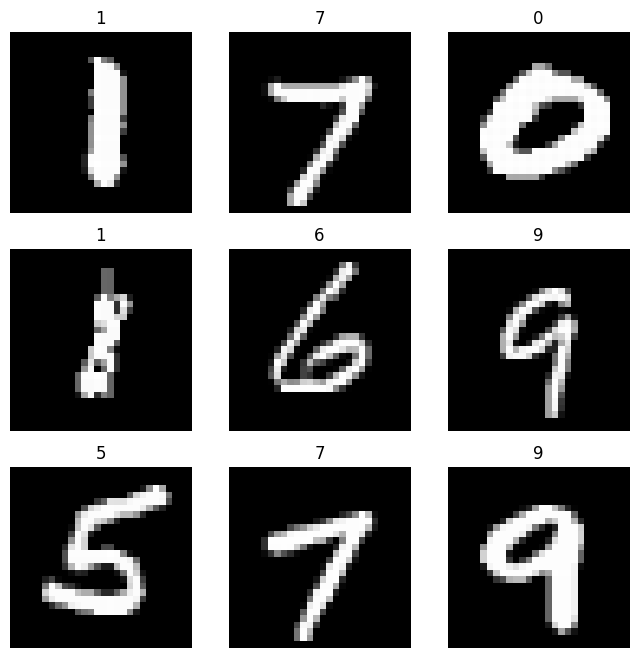

In [5]:
# Visualize data
def show_sample():
    fig, axs = plt.subplots(3, 3, figsize=(8, 8))
    axs = axs.flatten()
    sample = np.random.choice(range(x_train.shape[0]), 9)
    for i, data in enumerate(sample):
        axs[i].imshow(x_train[data], cmap='gray')
        axs[i].set_title(y_train[data])
        axs[i].axis('off')
    plt.show()
show_sample()

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical, plot_model

x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

batch_size = 128
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1, 
    rescale = 1./255,
    validation_split=0.2
)

train_gen = datagen.flow(
    x_train,
    y_train,
    batch_size=batch_size,
    subset='training'
)

val_gen = datagen.flow(
    x_train,
    y_train,
    batch_size=batch_size,
    subset='validation'
)

testgen = ImageDataGenerator()
test_gen = testgen.flow(
    x_test, 
    y_test,
    batch_size=batch_size
)

In [7]:
print("Y train: %s value %s" % (y_train.shape, y_train[0]))

Y train: (60000, 10) value [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Model with RELU

In [ ]:
from tensorflow.keras.optimizers import SGD
def create_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28,28,1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(layers.Dense(10, activation='softmax'))

    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
model = create_model()

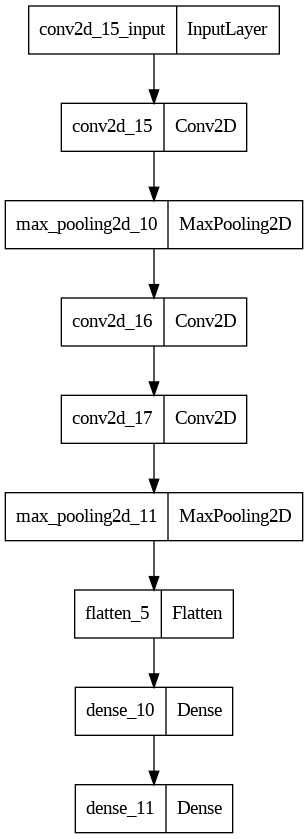

In [ ]:
plot_model(model)

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 conv2d_17 (Conv2D)          (None, 9, 9, 64)          36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 4, 4, 64)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 1024)             

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

cbs =[
    EarlyStopping(patience=3, restore_best_weights=True),
    ModelCheckpoint('Mnist.h5', save_best_only=True)
]

model.fit(train_gen, validation_data=val_gen, epochs=30, batch_size=128, verbose=2, callbacks=cbs)

Epoch 1/30
375/375 - 29s - loss: 0.4325 - accuracy: 0.8616 - val_loss: 0.1718 - val_accuracy: 0.9482 - 29s/epoch - 78ms/step
Epoch 2/30
375/375 - 22s - loss: 0.1451 - accuracy: 0.9550 - val_loss: 0.1174 - val_accuracy: 0.9651 - 22s/epoch - 59ms/step
Epoch 3/30
375/375 - 21s - loss: 0.1065 - accuracy: 0.9669 - val_loss: 0.1003 - val_accuracy: 0.9697 - 21s/epoch - 56ms/step
Epoch 4/30
375/375 - 17s - loss: 0.0877 - accuracy: 0.9729 - val_loss: 0.0888 - val_accuracy: 0.9704 - 17s/epoch - 46ms/step
Epoch 5/30
375/375 - 20s - loss: 0.0762 - accuracy: 0.9762 - val_loss: 0.0847 - val_accuracy: 0.9733 - 20s/epoch - 52ms/step
Epoch 6/30
375/375 - 18s - loss: 0.0666 - accuracy: 0.9794 - val_loss: 0.0888 - val_accuracy: 0.9742 - 18s/epoch - 47ms/step
Epoch 7/30
375/375 - 18s - loss: 0.0615 - accuracy: 0.9801 - val_loss: 0.0651 - val_accuracy: 0.9790 - 18s/epoch - 49ms/step
Epoch 8/30
375/375 - 18s - loss: 0.0578 - accuracy: 0.9816 - val_loss: 0.0647 - val_accuracy: 0.9810 - 18s/epoch - 47ms/step


In [ ]:
from keras.models import load_model
model_trained = load_model('./Mnist.h5')
test_loss, test_acc = model_trained.evaluate(test_gen)
print('Acc: ', test_acc)

79/79 [==============================] - 1s 7ms/step - loss: 3.8792 - accuracy: 0.9910
Acc:  0.9909999966621399


In [ ]:
# Predict label for test_image

pred = model_trained.predict(x_test)

print('1. Prediction array: %s' % (pred[0]))

print('2. Label number having highest confidence in prediction array: %s' % (np.argmax(pred[0])))

print('3. Actual label in dataset: %s' % (y_test[0]))

313/313 [==============================] - 1s 2ms/step
1. Prediction array: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
2. Label number having highest confidence in prediction array: 7
3. Actual label in dataset: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
class_names =['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

def plot_image(i, pred, true_label, img):
    pred, true_label, img = pred[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(pred)
    true_label = np.argmax(true_label)

    if predicted_label == true_label:
        color = 'blue'
    
    else:
        color = 'red'

    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                class_names[true_label]), color=color)
    

In [ ]:
def plot_value_array(i, pred, true_label):
    pred, true_label = pred[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), pred, color='gray')
    plt.ylim([0,1])
    pred = np.argmax(pred)
    true_label = np.argmax(true_label)

    thisplot[pred].set_color('red')
    thisplot[true_label].set_color('green')

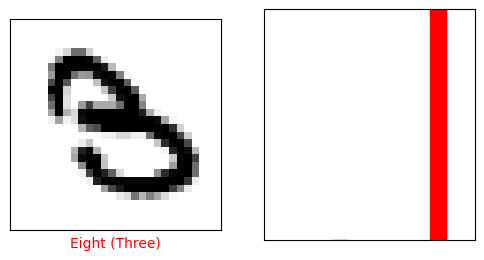

In [ ]:
i = 18
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)

plot_image(i, pred, y_test, x_test)

plt.subplot(1, 2, 2)
plot_value_array(i, pred, y_test)
plt.show()

# Model with leaky ReLU

In [8]:
def leaky_relu(z, name=None):
    return tf.maximum(0.01*z, z, name=name)

In [9]:
from tensorflow.keras.optimizers import SGD
def create_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation=leaky_relu, kernel_initializer='he_uniform', input_shape=(28,28,1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation=leaky_relu, kernel_initializer='he_uniform'))
    model.add(layers.Conv2D(64, (3, 3), activation=leaky_relu, kernel_initializer='he_uniform'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(100, activation=leaky_relu, kernel_initializer='he_uniform'))
    model.add(layers.Dense(10, activation='softmax'))

    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [11]:
model = create_model()

In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

cbs =[
    EarlyStopping(patience=3, restore_best_weights=True),
    ModelCheckpoint('Mnist.h5', save_best_only=True)
]

model.fit(train_gen, validation_data=val_gen, epochs=30, batch_size=128, verbose=2, callbacks=cbs)

Epoch 1/30
375/375 - 29s - loss: 0.4443 - accuracy: 0.8560 - val_loss: 0.1738 - val_accuracy: 0.9448 - 29s/epoch - 78ms/step
Epoch 2/30
375/375 - 19s - loss: 0.1488 - accuracy: 0.9544 - val_loss: 0.1234 - val_accuracy: 0.9608 - 19s/epoch - 50ms/step
Epoch 3/30
375/375 - 18s - loss: 0.1115 - accuracy: 0.9655 - val_loss: 0.0955 - val_accuracy: 0.9742 - 18s/epoch - 48ms/step
Epoch 4/30
375/375 - 20s - loss: 0.0879 - accuracy: 0.9731 - val_loss: 0.0917 - val_accuracy: 0.9718 - 20s/epoch - 52ms/step
Epoch 5/30
375/375 - 18s - loss: 0.0765 - accuracy: 0.9764 - val_loss: 0.0891 - val_accuracy: 0.9746 - 18s/epoch - 47ms/step
Epoch 6/30
375/375 - 19s - loss: 0.0709 - accuracy: 0.9777 - val_loss: 0.0745 - val_accuracy: 0.9775 - 19s/epoch - 51ms/step
Epoch 7/30
375/375 - 19s - loss: 0.0631 - accuracy: 0.9801 - val_loss: 0.0633 - val_accuracy: 0.9812 - 19s/epoch - 51ms/step
Epoch 8/30
375/375 - 19s - loss: 0.0596 - accuracy: 0.9816 - val_loss: 0.0662 - val_accuracy: 0.9795 - 19s/epoch - 51ms/step


In [13]:
from keras.models import load_model
model_trained = load_model('./Mnist.h5')
test_loss, test_acc = model_trained.evaluate(test_gen)
print('Acc: ', test_acc)

79/79 [==============================] - 1s 9ms/step - loss: 34.5903 - accuracy: 0.9550
Acc:  0.9549999833106995


# ELU

In [14]:
from tensorflow.keras.optimizers import SGD
def create_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_uniform', input_shape=(28,28,1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_uniform'))
    model.add(layers.Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_uniform'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(100, activation='elu', kernel_initializer='he_uniform'))
    model.add(layers.Dense(10, activation='softmax'))

    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [15]:
model = create_model()

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

cbs =[
    EarlyStopping(patience=3, restore_best_weights=True),
    ModelCheckpoint('Mnist.h5', save_best_only=True)
]

model.fit(train_gen, validation_data=val_gen, epochs=30, batch_size=128, verbose=2, callbacks=cbs)

Epoch 1/30
375/375 - 20s - loss: 0.3676 - accuracy: 0.8832 - val_loss: 0.1774 - val_accuracy: 0.9455 - 20s/epoch - 53ms/step
Epoch 2/30
375/375 - 19s - loss: 0.1294 - accuracy: 0.9597 - val_loss: 0.1051 - val_accuracy: 0.9689 - 19s/epoch - 50ms/step
Epoch 3/30
375/375 - 20s - loss: 0.0922 - accuracy: 0.9714 - val_loss: 0.0795 - val_accuracy: 0.9756 - 20s/epoch - 53ms/step
Epoch 4/30
375/375 - 18s - loss: 0.0801 - accuracy: 0.9756 - val_loss: 0.0818 - val_accuracy: 0.9747 - 18s/epoch - 48ms/step
Epoch 5/30
375/375 - 19s - loss: 0.0651 - accuracy: 0.9798 - val_loss: 0.0776 - val_accuracy: 0.9764 - 19s/epoch - 50ms/step
Epoch 6/30
375/375 - 17s - loss: 0.0607 - accuracy: 0.9814 - val_loss: 0.0702 - val_accuracy: 0.9786 - 17s/epoch - 47ms/step
Epoch 7/30
375/375 - 20s - loss: 0.0572 - accuracy: 0.9821 - val_loss: 0.0563 - val_accuracy: 0.9837 - 20s/epoch - 53ms/step
Epoch 8/30
375/375 - 18s - loss: 0.0536 - accuracy: 0.9828 - val_loss: 0.0676 - val_accuracy: 0.9808 - 18s/epoch - 47ms/step


In [17]:
from keras.models import load_model
model_trained = load_model('./Mnist.h5')
test_loss, test_acc = model_trained.evaluate(test_gen)
print('Acc: ', test_acc)

79/79 [==============================] - 1s 7ms/step - loss: 44.9274 - accuracy: 0.7733
Acc:  0.7732999920845032


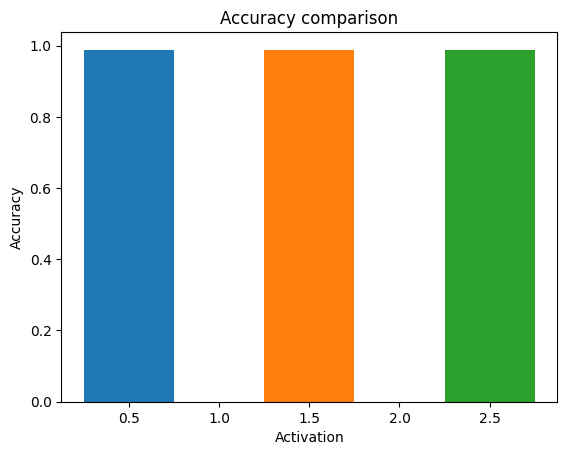

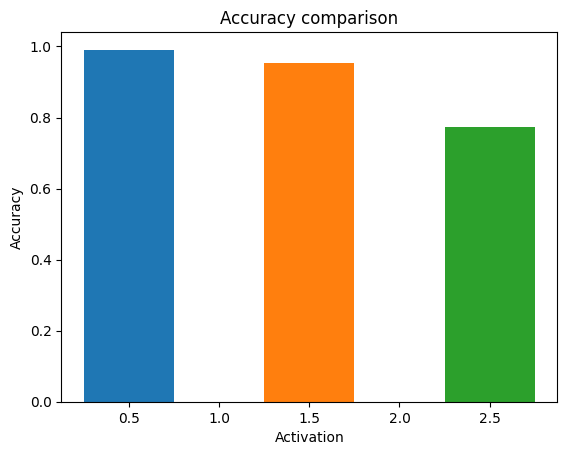

In [26]:
# compare
relu = [0.9868, 0.9909]
leaky_relu = [0.9868, 0.9549]
elu = [0.9884, 0.7732]

fig, ax = plt.subplots()
ax.bar(0.5, [relu[0], 0], 0.5)
ax.bar(1.5, [leaky_relu[0], 0], 0.5)
ax.bar(2.5, [elu[0], 0], 0.5)
plt.title('Accuracy comparison')
# plt.xticks(['relu', 'leaky_relu', 'elu'])
plt.xlabel('Activation')
plt.ylabel('Accuracy')
plt.show()

fig, ax = plt.subplots()
ax.bar(0.5, [relu[1], 0], 0.5)
ax.bar(1.5, [leaky_relu[1], 0], 0.5)
ax.bar(2.5, [elu[1], 0], 0.5)
plt.title('Accuracy comparison')
# plt.xticks(['relu', 'leaky_relu', 'elu'])
plt.xlabel('Activation')
plt.ylabel('Accuracy')
plt.show()

